# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

*I was watching this video from a meetup my friend was presenting a few months back because it blew my mind at the time and I really wanted to understand it: 
https://youtu.be/U-xf4scSB7o
They used genetic GANs to create human images. 
Spooky good images.*

*So I wanted to understand the GAN portion, because I roughly understand the broad concept of the genetic algorithim.*

*And I came across this collab notebook that compared GANS and ran it.*

https://colab.research.google.com/github/google/compare_gan/blob/master/compare_gan/src/tfhub_models.ipynb#scrollTo=65PLbu3MviWn  

In [0]:
#@title Imports, set up, and helper functions

from google.colab import output

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub


tf.logging.set_verbosity(tf.logging.ERROR)


# Get the module metadata for the GANs as a pandas DataFrame.
module_metadata_dict = {'dataset': ['CelebA HQ (128x128)', 'CelebA HQ (128x128)', 'LSUN Bedroom', 'LSUN Bedroom', 'CelebA HQ (128x128)', 'CelebA HQ (128x128)', 'LSUN Bedroom', 'LSUN Bedroom', 'CelebA HQ (128x128)', 'LSUN Bedroom', 'CIFAR10', 'CIFAR10', 'CIFAR10', 'CIFAR10', 'CIFAR10'], 'penalty': ['-', '-', '-', '-', '-', '-', '-', '-', 'DRAGAN (lambda=1.000)', 'WGAN (lambda=0.145)', '-', '-', '-', '-', 'WGAN (lambda=1.000)'], 'architecture': ['ResNet19', 'ResNet19', 'ResNet19', 'ResNet19', 'ResNet19', 'ResNet19', 'ResNet19', 'ResNet19', 'ResNet19', 'ResNet19', 'ResNet CIFAR', 'ResNet CIFAR', 'ResNet CIFAR', 'ResNet CIFAR', 'ResNet CIFAR'], 'beta1': ['0.375', '0.500', '0.585', '0.195', '0.500', '0.500', '0.500', '0.102', '0.500', '0.711', '0.500', '0.500', '0.500', '0.500', '0.500'], 'beta2': ['0.998', '0.999', '0.990', '0.882', '0.999', '0.999', '0.999', '0.998', '0.900', '0.979', '0.999', '0.999', '0.999', '0.999', '0.999'], 'module_url': ['https://tfhub.dev/google/compare_gan/model_1_celebahq128_resnet19/1', 'https://tfhub.dev/google/compare_gan/model_2_celebahq128_resnet19/1', 'https://tfhub.dev/google/compare_gan/model_3_lsun_bedroom_resnet19/1', 'https://tfhub.dev/google/compare_gan/model_4_lsun_bedroom_resnet19/1', 'https://tfhub.dev/google/compare_gan/model_5_celebahq128_resnet19/1', 'https://tfhub.dev/google/compare_gan/model_6_celebahq128_resnet19/1', 'https://tfhub.dev/google/compare_gan/model_7_lsun_bedroom_resnet19/1', 'https://tfhub.dev/google/compare_gan/model_8_lsun_bedroom_resnet19/1', 'https://tfhub.dev/google/compare_gan/model_9_celebahq128_resnet19/1', 'https://tfhub.dev/google/compare_gan/model_10_lsun_bedroom_resnet19/1', 'https://tfhub.dev/google/compare_gan/model_11_cifar10_resnet_cifar/1', 'https://tfhub.dev/google/compare_gan/model_12_cifar10_resnet_cifar/1', 'https://tfhub.dev/google/compare_gan/model_13_cifar10_resnet_cifar/1', 'https://tfhub.dev/google/compare_gan/model_14_cifar10_resnet_cifar/1', 'https://tfhub.dev/google/compare_gan/model_15_cifar10_resnet_cifar/1'], 'disc_iters': [1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 5, 5, 5, 5], 'model': ['Non-saturating GAN', 'Non-saturating GAN', 'Least-squares GAN', 'Non-saturating GAN', 'Non-saturating GAN', 'Non-saturating GAN', 'Least-squares GAN', 'Non-saturating GAN', 'Non-saturating GAN', 'Non-saturating GAN', 'Non-saturating GAN', 'Non-saturating GAN', 'Non-saturating GAN', 'Non-saturating GAN', 'Non-saturating GAN'], 'inception_score': ['2.38', '2.59', '4.23', '4.10', '2.38', '2.54', '3.64', '3.58', '2.34', '3.92', '7.57', '7.47', '7.74', '7.74', '7.70'], 'disc_norm': ['none', 'none', 'none', 'none', 'layer_norm', 'layer_norm', 'spectral_norm', 'spectral_norm', 'layer_norm', 'layer_norm', 'none', 'none', 'spectral_norm', 'spectral_norm', 'spectral_norm'], 'fid': ['34.29', '35.85', '102.74', '112.92', '30.02', '32.05', '41.60', '42.51', '29.13', '40.36', '28.12', '30.08', '22.91', '23.22', '22.73'], 'ms_ssim_score': ['0.32', '0.29', 'N/A', 'N/A', '0.29', '0.28', 'N/A', 'N/A', '0.30', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A'], 'learning_rate': ['3.381e-05', '1.000e-04', '3.220e-05', '1.927e-05', '1.000e-04', '1.000e-04', '2.000e-04', '2.851e-04', '1.000e-04', '1.281e-04', '2.000e-04', '1.000e-04', '2.000e-04', '2.000e-04', '2.000e-04']}
MODULE_METADATA = pd.DataFrame.from_dict(module_metadata_dict)

# To start, select the module with the lowest FID score.
MIN_FID_MODULE = MODULE_METADATA.loc[
    MODULE_METADATA['fid'].astype(float).idxmin()]

SELECTED_MODULE = MIN_FID_MODULE['module_url']
SELECTED_MODULE_DATASET = MIN_FID_MODULE['dataset']


# Display multiple images in the same figure.
def display_images(images, captions=None):
  batch_size, dim1, dim2, channels = images.shape
  num_horizontally = 8
  
  # Use a smaller figure size for the CIFAR10 images
  figsize = (20, 20) if dim1 > 32 else (10, 10)
  f, axes = plt.subplots(
      len(images) // num_horizontally, num_horizontally, figsize=figsize)
  for i in range(len(images)):
    axes[i // num_horizontally, i % num_horizontally].axis("off")
    if captions is not None:
      axes[i // num_horizontally, i % num_horizontally].text(0, -3, captions[i])
    axes[i // num_horizontally, i % num_horizontally].imshow(images[i])
  f.tight_layout()
  

# Show the HTML for the module table
class ShowModuleTable(object):
  def __init__(self, callback):
    self._callback = callback

  def _repr_html_(self):
    # Set up the template with some nice CSS.
    template = """
    <style>
       table {
         font-size: 15px;
         font-family: Inconsolata, monospace;
         border-collapse: collapse;
         border: 1px solid #444444;
       }
       th {
         font-size: 18px;
         background-color: #DDDDDD;
         border: 1px solid #AAAAAA;
         white-space: nowrap;
       }
       tr {
         cursor: pointer;
         white-space: nowrap;
       }
       td {
         padding: 6px 6px 6px 6px;
         border: 1px solid #AAAAAA;
       }
      .selected-row {
        font-weight: bold;
        background-color: #B0BED9;
      }
    </style>
    <table>"""
    
    # Set up the headers with nicely readable names
    table_headers = [
      ('dataset', 'Dataset'),
      ('architecture', 'Architecture'),
      ('fid', 'FID'),
      ('inception_score', 'IS'),
      ('ms_ssim_score', 'MS-SSIM'),
      ('model', 'Model'),
      ('learning_rate', 'Learning rate'),
      ('beta1', '&beta;<sub>1</sub>'),
      ('beta2', '&beta;<sub>2</sub>'),
      ('disc_iters', 'n<sub>disc</sub>'),
      ('disc_norm', 'Disc norm'),
      ('penalty', 'Penalty'),
      ('module_url', 'Module name'),
    ]
    header_template = "<tr>"
    for _, header_name in table_headers:
      header_template += "<th>" + header_name + "</th>"
    header_template += "</tr>"
    template += header_template
    
    for i, (_, row) in enumerate(MODULE_METADATA.iterrows()):
      uuid = "row-%s" % i
      
      # Reister the callback for every row.
      output.register_callback(uuid, self._callback)
      
      # By default select the module with the min FID.
      selected_class = ""
      if row['module_url'] == MIN_FID_MODULE['module_url']:
        selected_class = "class=\"selected-row\""

      # Get the metadata for each row.
      row_template = "<tr id=\"" + uuid + "\"" + selected_class + ">"
      for key, _ in table_headers:
        row_template += "<td>" + str(row[key]) + "</td>"
      row_template += "</tr>"
      template += row_template
      
    # Add the onclick handlers for the table rows.
    template += """
      </table>
      <script>"""
    
    for i, (_, row) in enumerate(MODULE_METADATA.iterrows()):
      uuid = "row-%s" % i
      m = row['module_url']
      d = row['dataset']
      template += """
        document.querySelector(\"#""" + uuid + """\").onclick = function() {
          google.colab.kernel.invokeFunction('""" + uuid + """', ['""" + m +"""', '""" + d + """'], {});
          var selected = document.getElementsByClassName('selected-row');
          for (var i = 0; i < selected.length; i++) {
            selected[i].classList.remove('selected-row');
          }
          this.classList.toggle("selected-row");
          e.preventDefault();
        };
        """
    template += """</script>"""
    return template


def set_selected_module(module_name, dataset):
  # Assign the selected module and dataset to the global variables
  global SELECTED_MODULE
  SELECTED_MODULE = module_name
  global SELECTED_MODULE_DATASET
  SELECTED_MODULE_DATASET = dataset

In [5]:
#@title Run this cell and select which GAN module to use below

ShowModuleTable(set_selected_module)

Using module: "https://tfhub.dev/google/compare_gan/model_2_celebahq128_resnet19/1"
Generating images like dataset: "CelebA HQ (128x128)"


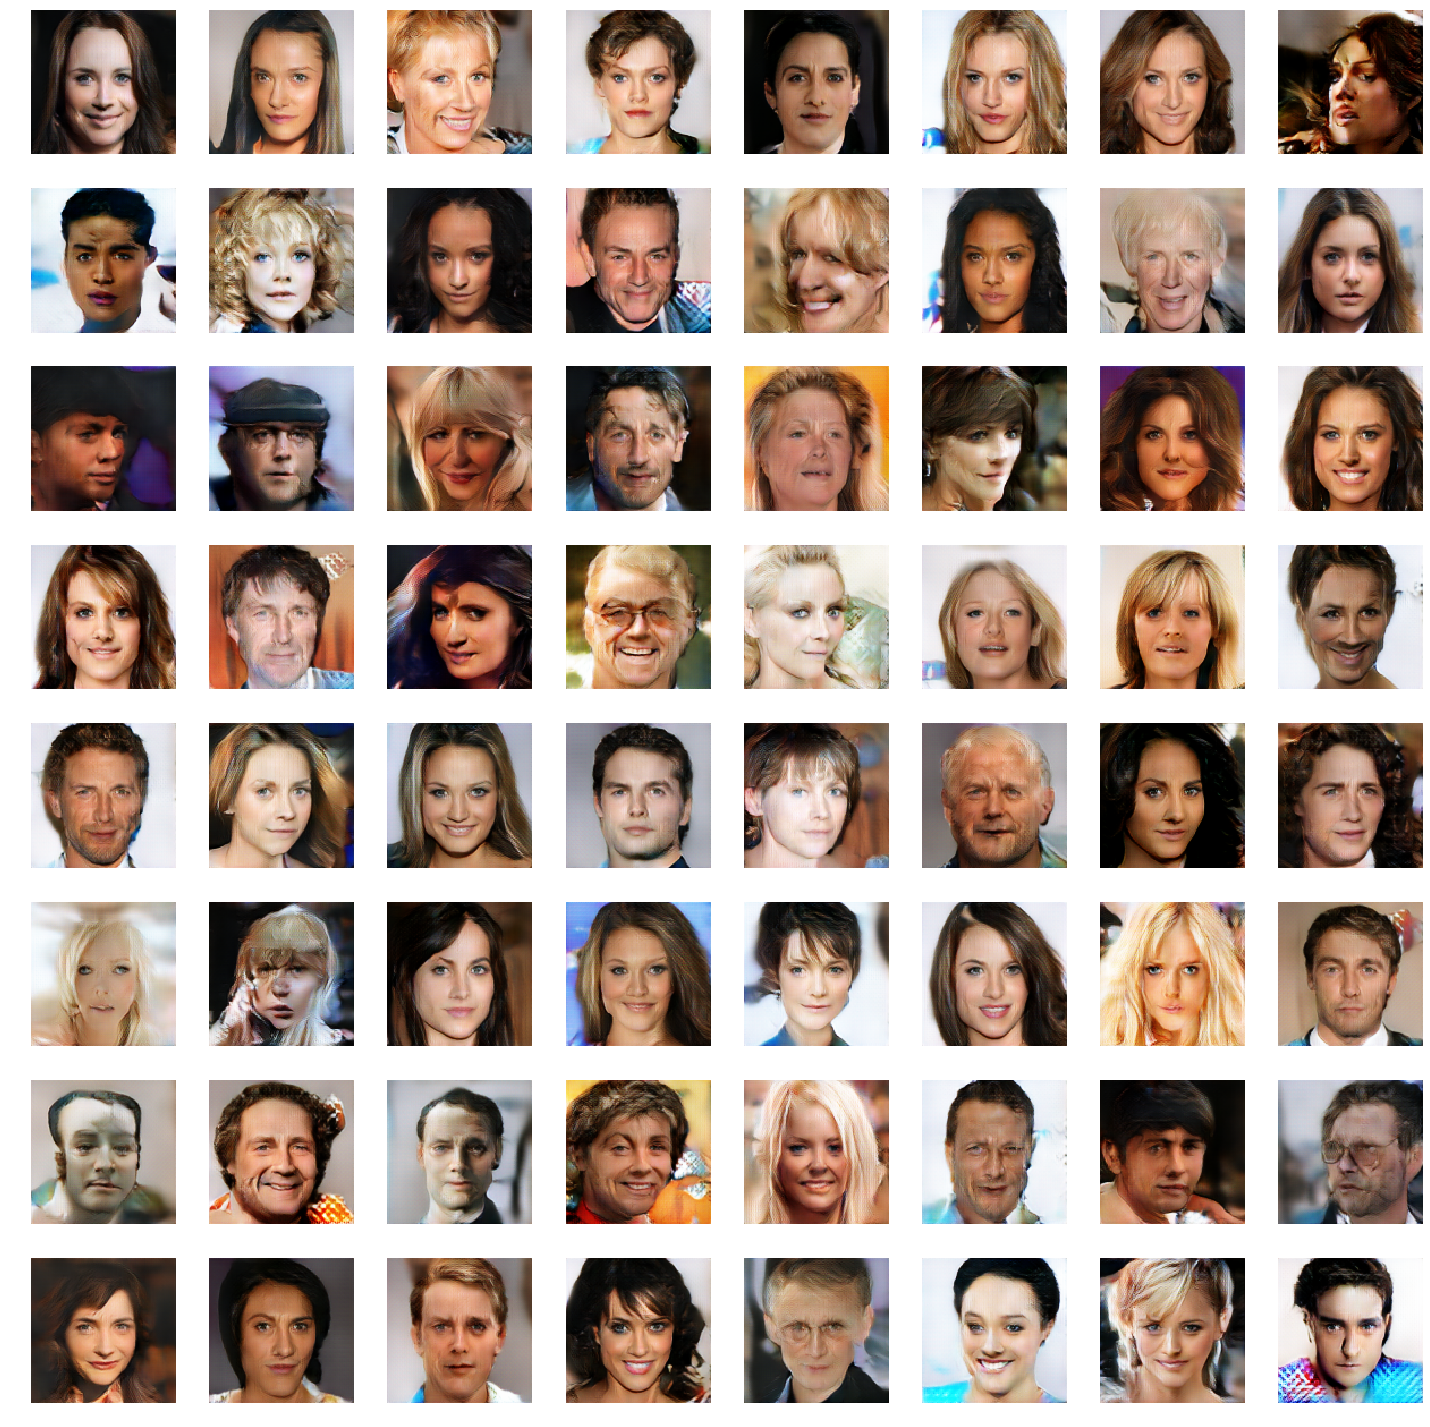

In [6]:
assert SELECTED_MODULE is not None and SELECTED_MODULE_DATASET is not None, \
  'You must run the above cell and select a module from the table to generate images.'

print('Using module: "%s"' % SELECTED_MODULE)
print('Generating images like dataset: "%s"' % SELECTED_MODULE_DATASET)

# The generator expects a batch of 64 vectors of size 128
batch_size = 64
z_dim = 128

with tf.Graph().as_default():
  # Load the selected module
  gan = hub.Module(SELECTED_MODULE)
  z_input = tf.placeholder(dtype=tf.float32, shape=(batch_size, z_dim))
  image_output = gan(z_input, signature="generator") 
  
  with tf.train.MonitoredSession() as session:
    # Generate 64 random vectors as input to the latent space to generate images
    z_values = np.random.uniform(-1, 1, size=(batch_size, z_dim))
    images = session.run(image_output, feed_dict={z_input: z_values})

    # View the resulting images
    display_images(images)

Using module: "https://tfhub.dev/google/compare_gan/model_4_lsun_bedroom_resnet19/1"
Generating images like dataset: "LSUN Bedroom"


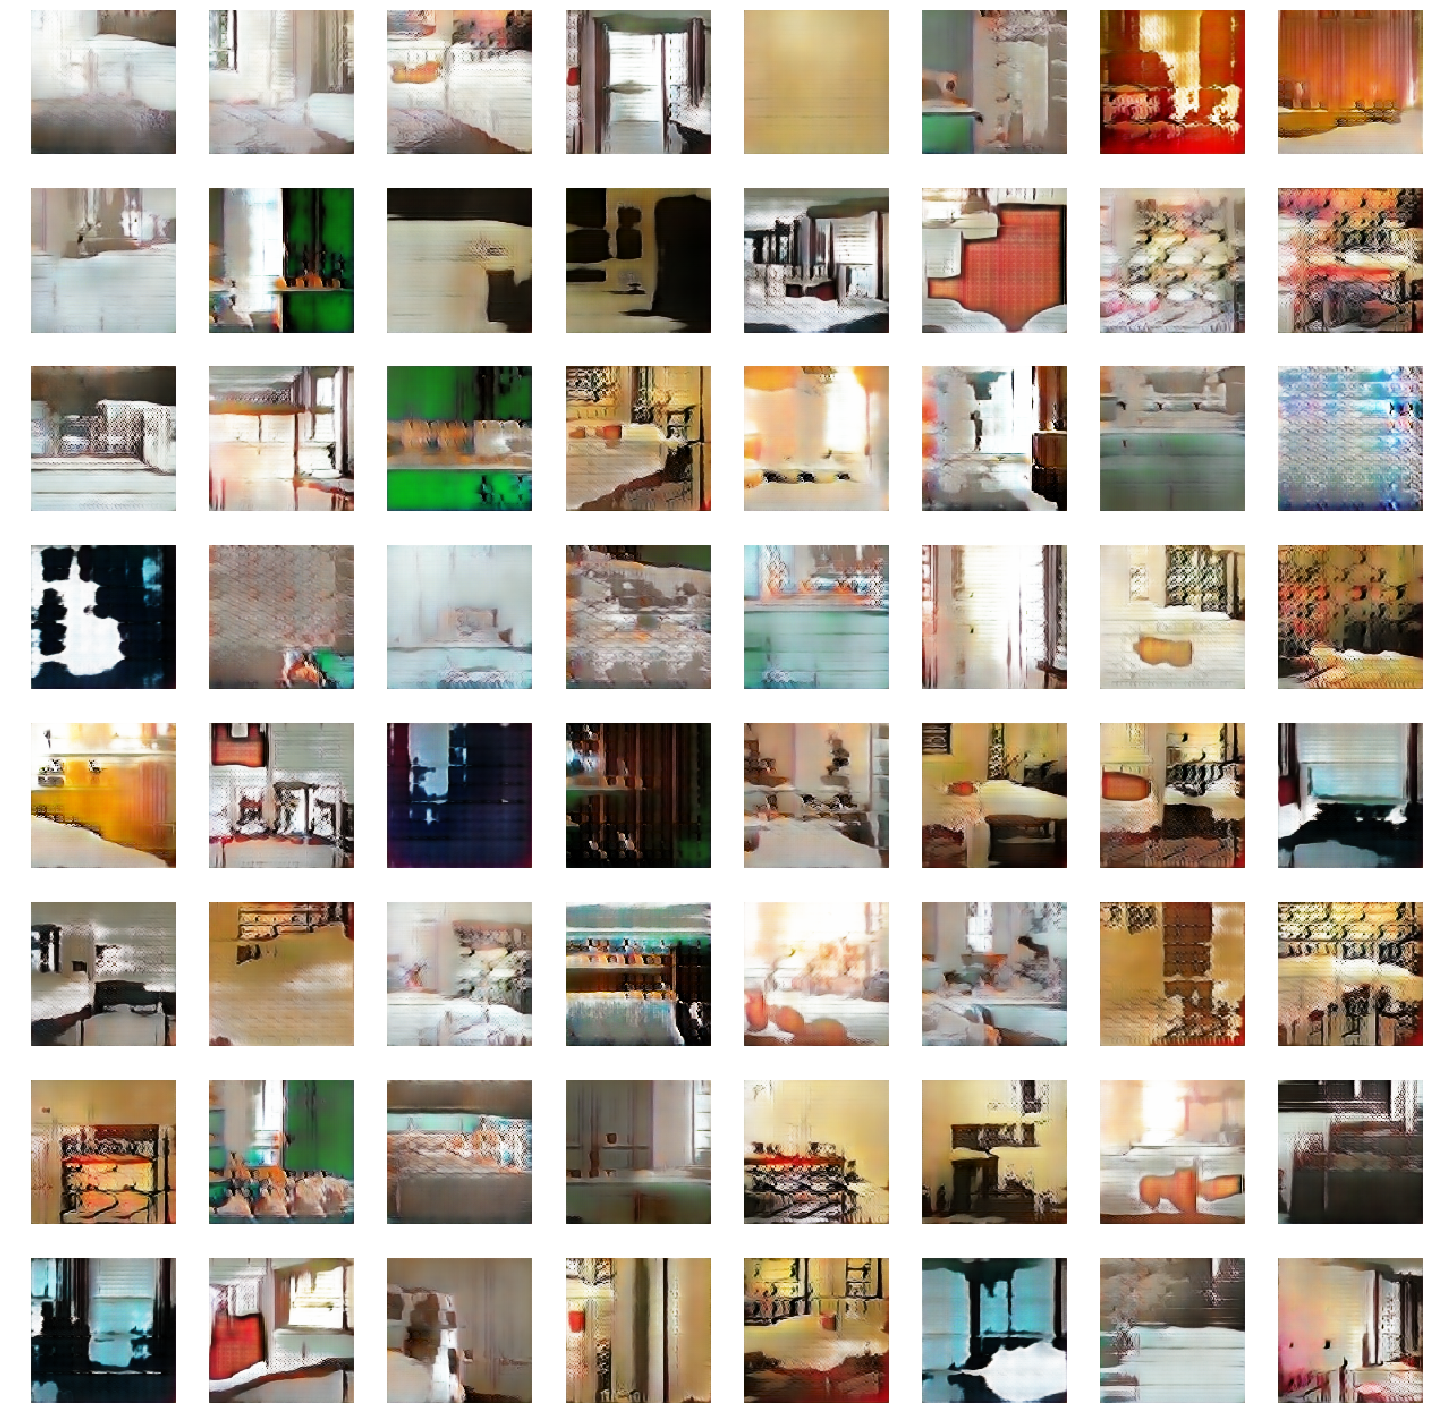

In [7]:
assert SELECTED_MODULE is not None and SELECTED_MODULE_DATASET is not None, \
  'You must run the above cell and select a module from the table to generate images.'

print('Using module: "%s"' % SELECTED_MODULE)
print('Generating images like dataset: "%s"' % SELECTED_MODULE_DATASET)

# The generator expects a batch of 64 vectors of size 128
batch_size = 64
z_dim = 128

with tf.Graph().as_default():
  # Load the selected module
  gan = hub.Module(SELECTED_MODULE)
  z_input = tf.placeholder(dtype=tf.float32, shape=(batch_size, z_dim))
  image_output = gan(z_input, signature="generator") 
  
  with tf.train.MonitoredSession() as session:
    # Generate 64 random vectors as input to the latent space to generate images
    z_values = np.random.uniform(-1, 1, size=(batch_size, z_dim))
    images = session.run(image_output, feed_dict={z_input: z_values})

    # View the resulting images
    display_images(images)

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




### Assignment Answers 

1.  I watched a neat youtube video where the presenter used a Genetic GAN to generate detailed images of humans from scratch! I needed to understand it better so I searched Google to find a Collab notebook that would allow me to become better acquainted with different types of GANs. I found this collab and pulled the code into this notebook so I could look at it and see visually what they output. 

2. The most challenging part was finding a working GAN notebook with pretrained models that I could use. Many GAN notebooks have code to be run on local systems (i.e. not in Collab) because they are not yet trained models. 

3. I started going though and playing around with a dataset to find out how to host my own dataset using google drive. 

4. I'd like to look more into training my own GAN and try to understand Genetic Algorithims. 

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about